# 1) Mengumpulkan Data

Sumber dataset: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Menyimpan fitur (features) ke dalam DataFrame
df_features = breast_cancer_wisconsin_diagnostic.data.features

# Menyimpan target ke dalam DataFrame terpisah
df_target = breast_cancer_wisconsin_diagnostic.data.targets

# Menggabungkan features dan target menjadi satu DataFrame
df = pd.concat([df_features, df_target], axis=1)

# Menampilkan lima baris pertama dari DataFrame yang telah digabungkan
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


# 2) Menelaah Data

In [ ]:
df.shape

(569, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [ ]:
features = df.iloc[:, :-1].columns.tolist()
df[features].corr()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
radius1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter1,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area1,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness1,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness1,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity1,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points1,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry1,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension1,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


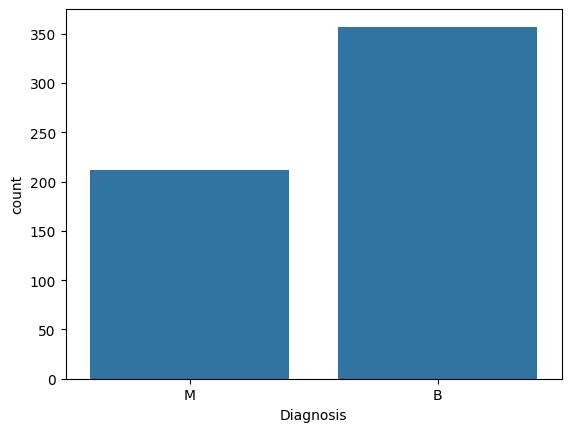

In [ ]:
sns.countplot(x='Diagnosis', data=df)
plt.show()

In [ ]:
df.Diagnosis.value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

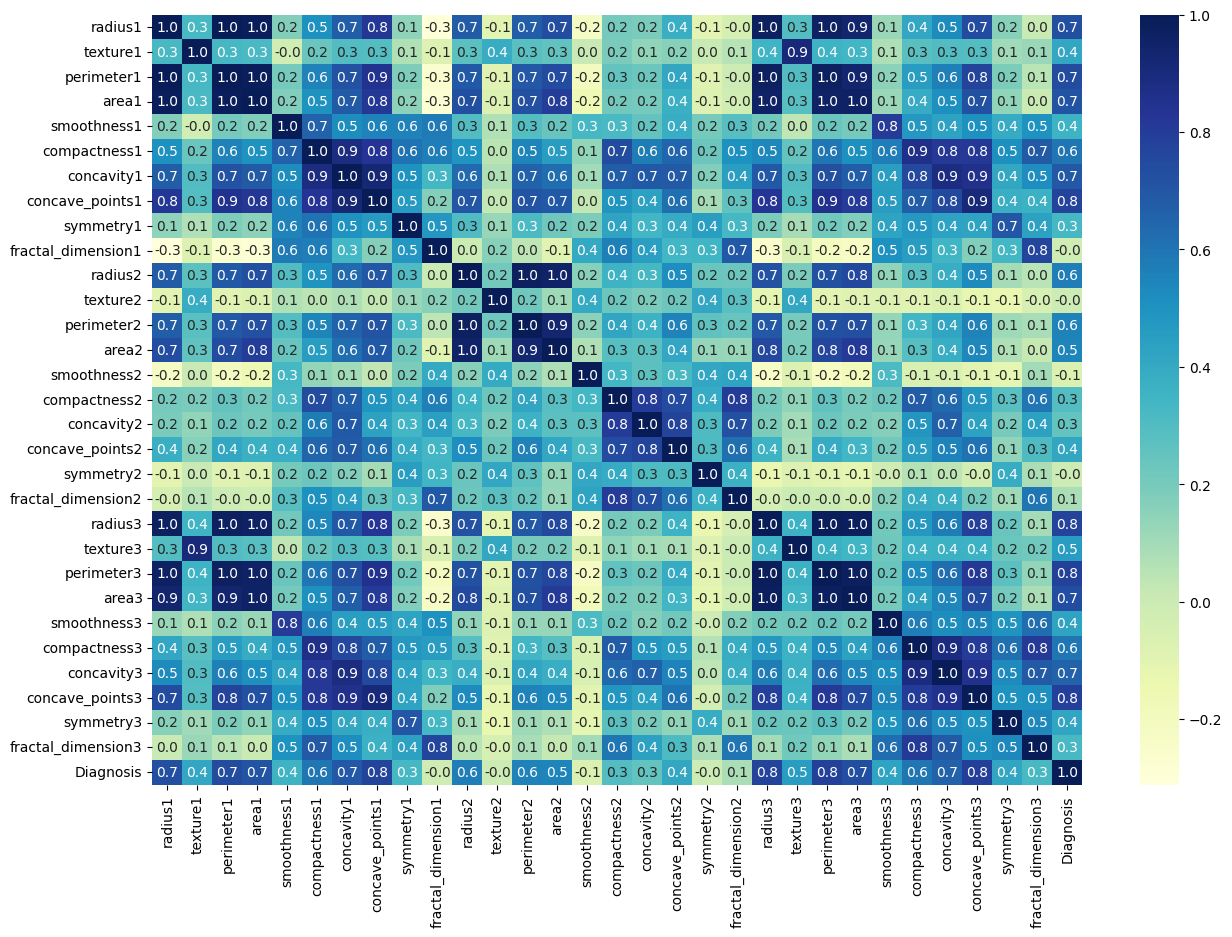

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='YlGnBu')
plt.show()

In [ ]:
# ambil nilai korelasi > 85 pada kolom diagnosis
df.corr()['Diagnosis'][(df.corr()['Diagnosis'] > 0.70) | (df.corr()['Diagnosis'] < -0.70)]

radius1            0.730029
perimeter1         0.742636
area1              0.708984
concave_points1    0.776614
radius3            0.776454
perimeter3         0.782914
area3              0.733825
concave_points3    0.793566
Diagnosis          1.000000
Name: Diagnosis, dtype: float64

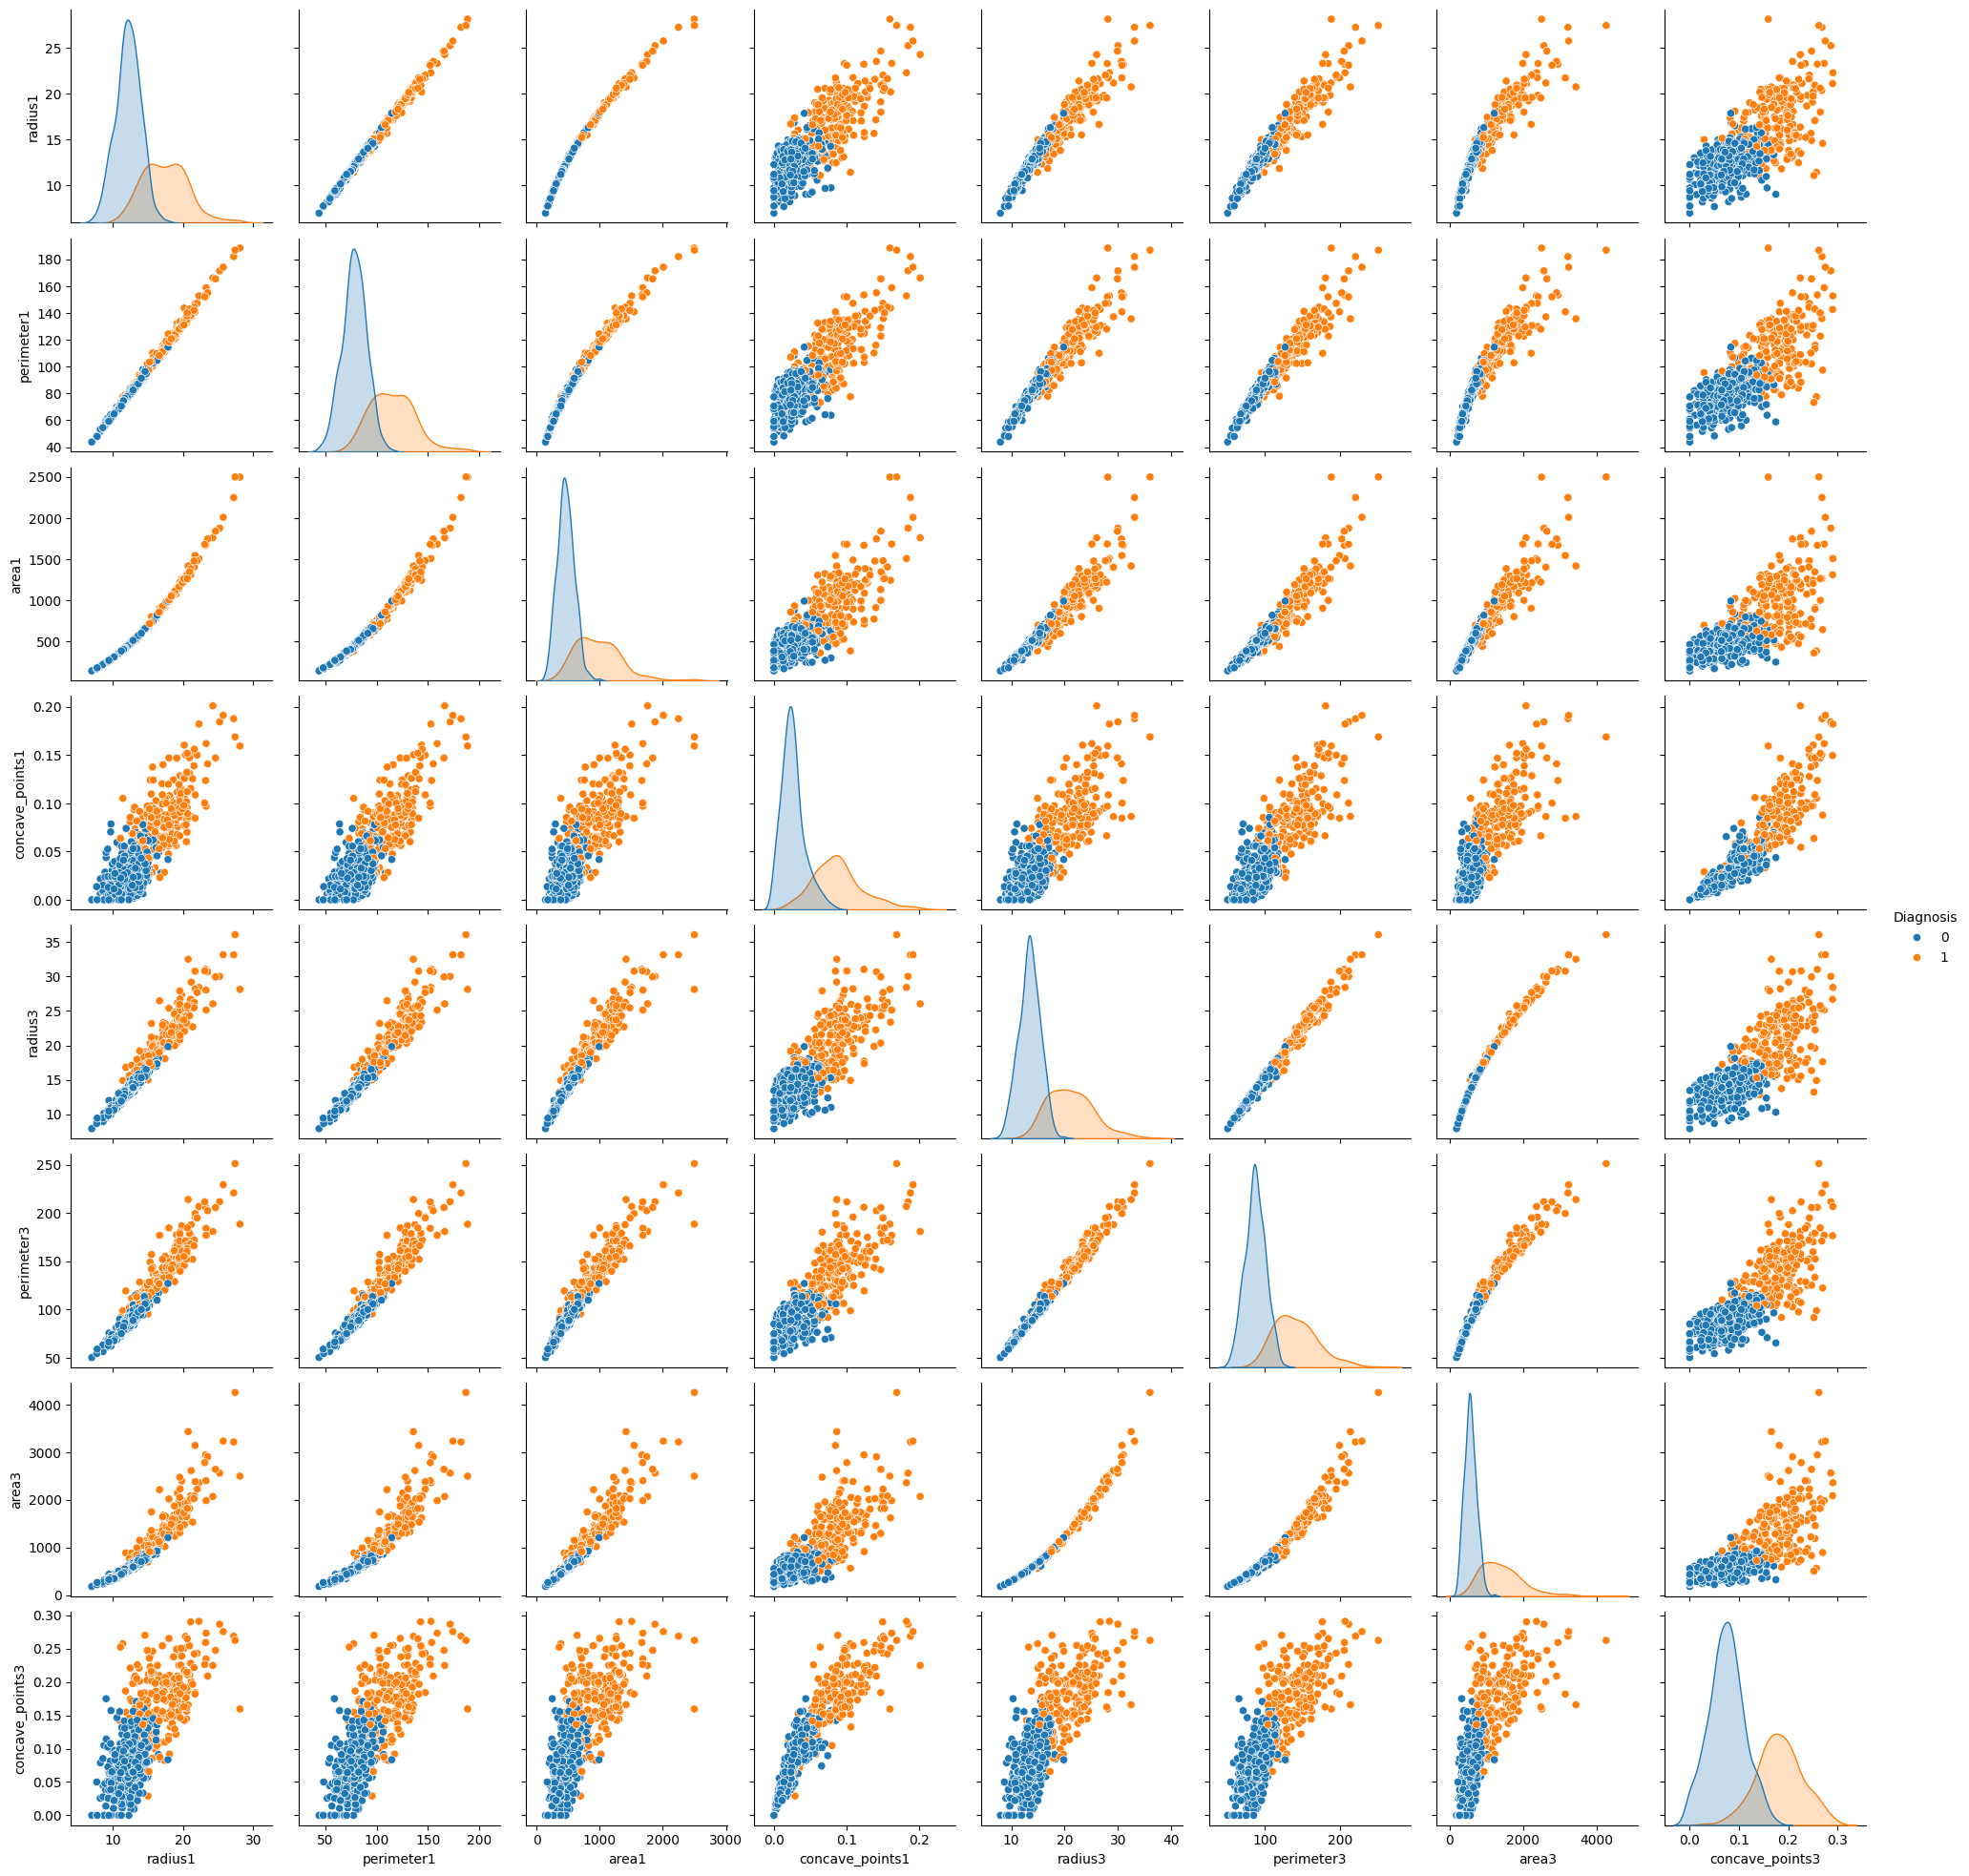

In [ ]:
feats = ['radius1', 'perimeter1', 'area1', 'concave_points1', 'radius3', 'perimeter3', 'area3', 'concave_points3', 'Diagnosis']

sns.pairplot(df[feats], hue='Diagnosis')
plt.show()

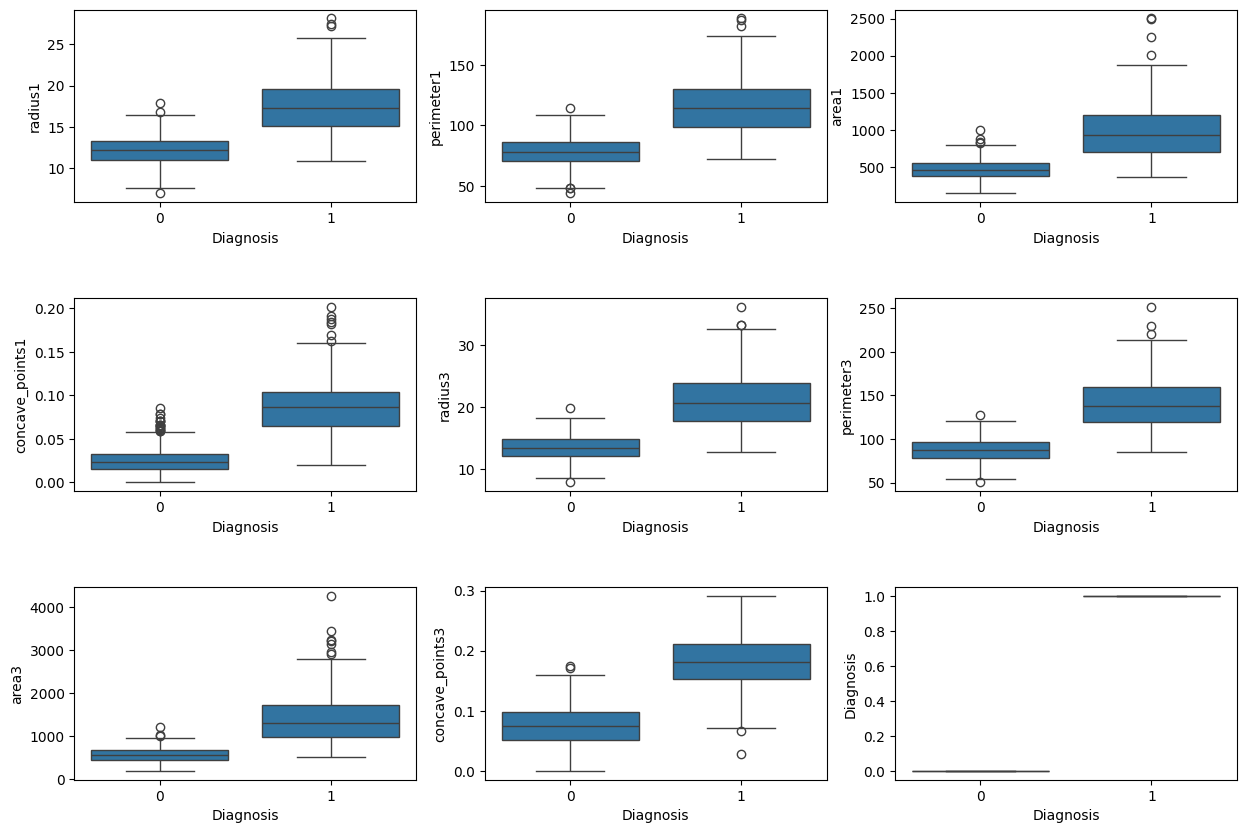

In [ ]:
# buat boxplot untuk tiap kolom di feats
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(feats):
    sns.boxplot(x='Diagnosis', y=col, data=df, ax=ax[i//3, i%3])

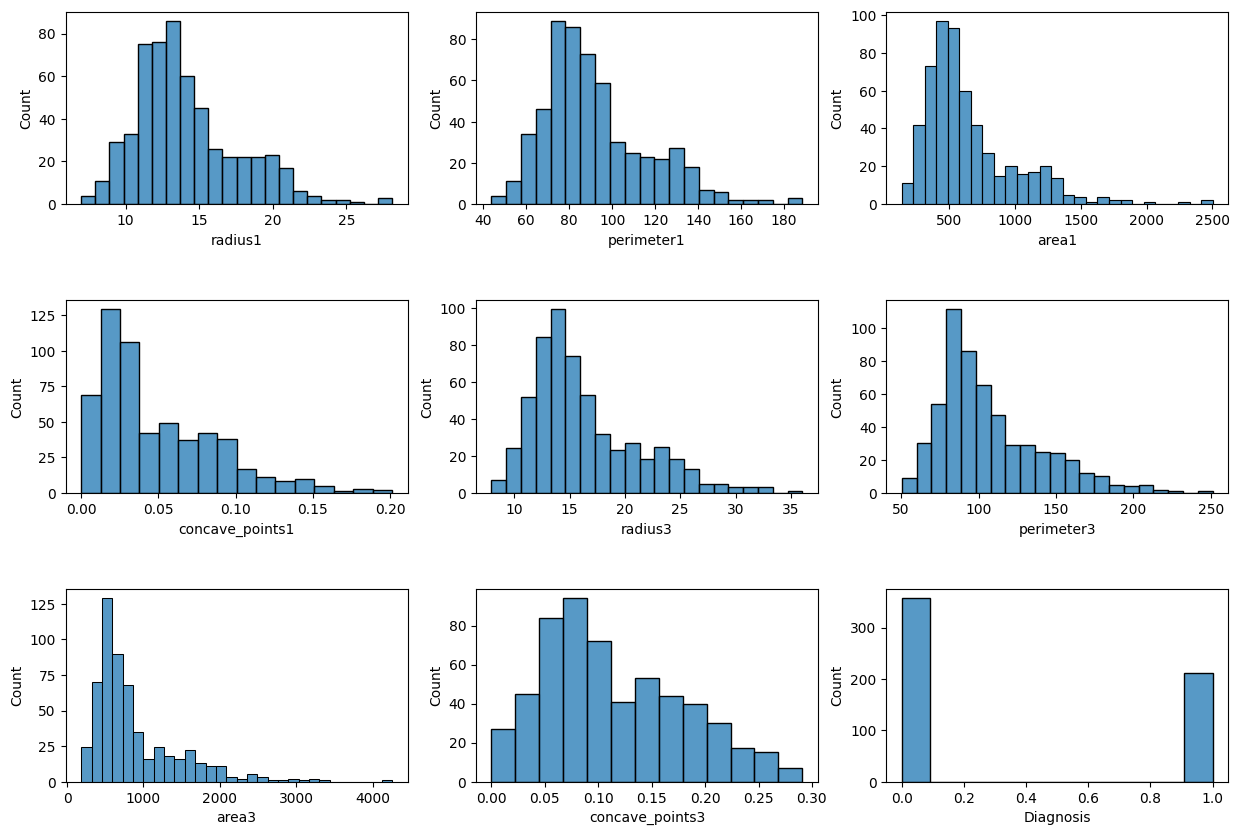

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(feats):
    sns.histplot(x=col, data=df, ax=ax[i//3, i%3])

# 3) Memvalidasi Data

In [ ]:
# cek duplikasi
df.duplicated().sum()

0

In [ ]:
# cek missing value
df.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

In [ ]:
# cari apakah di tiap kolom ada yang nilainya '?'
df.isin(['?']).sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

In [ ]:
# pd.set_option('display.max_columns', None) -> buat ngatur biar semua kolom keliatan

In [ ]:
# pd.reset_option('display.max_columns') -> reset

# 4) Menentukan Objek Data
Feature Selection


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [ ]:
best_features = SelectKBest(score_func=f_classif, k=5)
fit = best_features.fit(X, y)

kscores = pd.DataFrame(fit.scores_)
kcolumns = pd.DataFrame(X.columns)

featuresScores = pd.concat([kcolumns, kscores], axis=1)
featuresScores.columns = ['Feature', 'Score']
featuresScores_sorted = featuresScores.sort_values(by='Score', ascending=False)
print(featuresScores_sorted.head())

            Feature       Score
27  concave_points3  964.385393
22       perimeter3  897.944219
7   concave_points1  861.676020
20          radius3  860.781707
2        perimeter1  697.235272


Berdasarkan hal tersebut, feature yang dipilh untuk pemodelan adalah concave_points3, perimeter3, concave_points1, radius3, perimeter1

# 5) Membersihkan Data

In [ ]:
selected_columns = ['concave_points3', 'perimeter3', 'concave_points1', 'radius3', 'perimeter1']
df_selected = df[selected_columns]

In [ ]:
print(df_selected.applymap(np.isinf).sum())

concave_points3    0
perimeter3         0
concave_points1    0
radius3            0
perimeter1         0
dtype: int64


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   concave_points3  569 non-null    float64
 1   perimeter3       569 non-null    float64
 2   concave_points1  569 non-null    float64
 3   radius3          569 non-null    float64
 4   perimeter1       569 non-null    float64
dtypes: float64(5)
memory usage: 22.4 KB


In [ ]:
df_selected.isin(['0']).sum()

concave_points3    0
perimeter3         0
concave_points1    0
radius3            0
perimeter1         0
dtype: int64

In [ ]:
# Definisikan fungsi untuk memeriksa tipe data
def check_type(column, expected_type):
    return column.apply(lambda x: not isinstance(x, expected_type))

for col in selected_columns:
  print(col, ':', check_type(df_selected[col], (int, float)).sum())

concave_points3 : 0
perimeter3 : 0
concave_points1 : 0
radius3 : 0
perimeter1 : 0


# 5) Mengkontruksi Data

In [ ]:
df_selected = pd.concat([df_selected, df['Diagnosis']], axis=1)

In [ ]:
df_selected.head()

,concave_points3,perimeter3,concave_points1,radius3,perimeter1,Diagnosis
0,0.2654,184.60,0.14710,25.38,122.80,1
1,0.1860,158.80,0.07017,24.99,132.90,1
2,0.2430,152.50,0.12790,23.57,130.00,1
3,0.2575,98.87,0.10520,14.91,77.58,1
4,0.1625,152.20,0.10430,22.54,135.10,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
selected_columns

['concave_points3', 'perimeter3', 'concave_points1', 'radius3', 'perimeter1']

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected[selected_columns])

In [ ]:
df_scaled

array([[ 2.29607613,  2.30360062,  2.53247522,  1.88668963,  1.26993369],
       [ 1.0870843 ,  1.53512599,  0.54814416,  1.80592744,  1.68595471],
       [ 1.95500035,  1.34747521,  2.03723076,  1.51187025,  1.56650313],
       ...,
       [ 0.41406869,  0.57900058,  0.10577736,  0.56136143,  0.67267578],
       [ 2.28998549,  2.30360062,  2.65886573,  1.96123934,  1.98252415],
       [-1.74506282, -1.43273495, -1.26181958, -1.41089258, -1.81438851]])

# 7) Menentukan Label Data

In [ ]:
X = df_scaled
y = df_selected['Diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Data training: ', X_train.shape[0])
print('Data testing: ', X_test.shape[0])

Data training:  455
Data testing:  114


# 8) Membangun Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def eval_model(model, X, y):
  y_pred = model.predict(X)

  accuracy = accuracy_score(y, y_pred)
  presisi = precision_score(y, y_pred)
  recall = recall_score(y, y_pred)
  f1 = f1_score(y, y_pred)

  print('Accuracy: %.3f' %accuracy)
  print('Precision: %.3f' %presisi)
  print('Recall: %.3f' %recall)
  print('F1 Score: %.3f' %f1)

def cm_display(model, X, y):
  y_pred = model.predict(X)
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap=plt.cm.YlGnBu)
  plt.show()

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

eval_model(logreg, X_train, y_train)
print(" ")
eval_model(logreg, X_test, y_test)

Accuracy: 0.945
Precision: 0.944
Recall: 0.905
F1 Score: 0.924
 
Accuracy: 0.974
Precision: 0.955
Recall: 0.977
F1 Score: 0.966


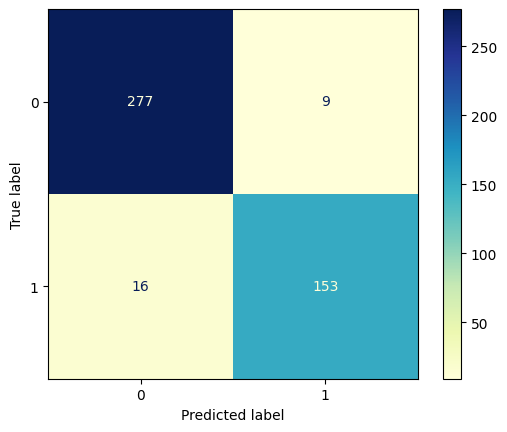

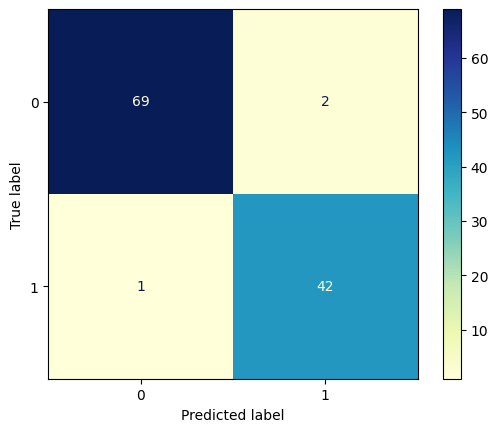

In [ ]:
cm_display(logreg, X_train, y_train)
print(' ')
cm_display(logreg, X_test, y_test)

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

eval_model(dt, X_train, y_train)
print(" ")
eval_model(dt, X_test, y_test)

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
 
Accuracy: 0.947
Precision: 0.951
Recall: 0.907
F1 Score: 0.929


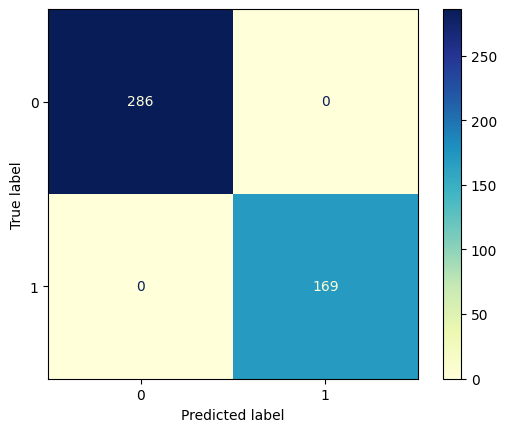

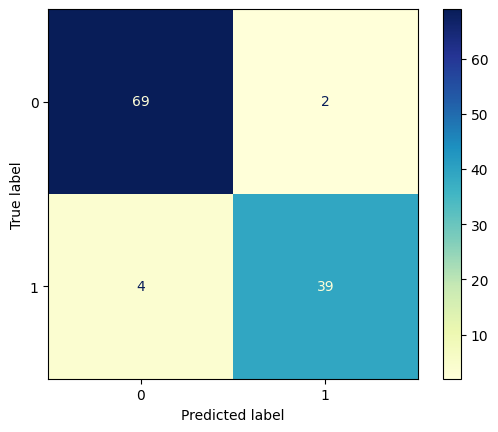

In [ ]:
cm_display(dt, X_train, y_train)
print(' ')
cm_display(dt, X_test, y_test)

In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

eval_model(rf, X_train, y_train)
print(" ")
eval_model(rf, X_test, y_test)

Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000
 
Accuracy: 0.947
Precision: 0.951
Recall: 0.907
F1 Score: 0.929


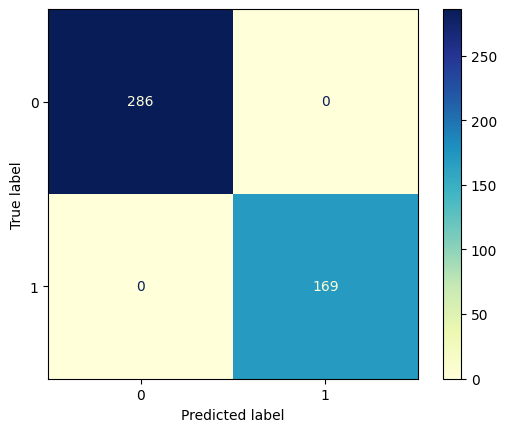

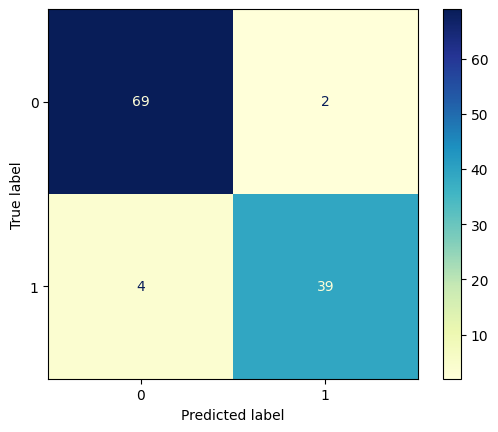

In [ ]:
cm_display(rf, X_train, y_train)
print(' ')
cm_display(rf, X_test, y_test)

In [ ]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

eval_model(knn, X_train, y_train)
print(" ")
eval_model(knn, X_test, y_test)

Accuracy: 0.954
Precision: 0.968
Recall: 0.905
F1 Score: 0.936
 
Accuracy: 0.965
Precision: 0.953
Recall: 0.953
F1 Score: 0.953


Text(0, 0.5, 'accuracy')

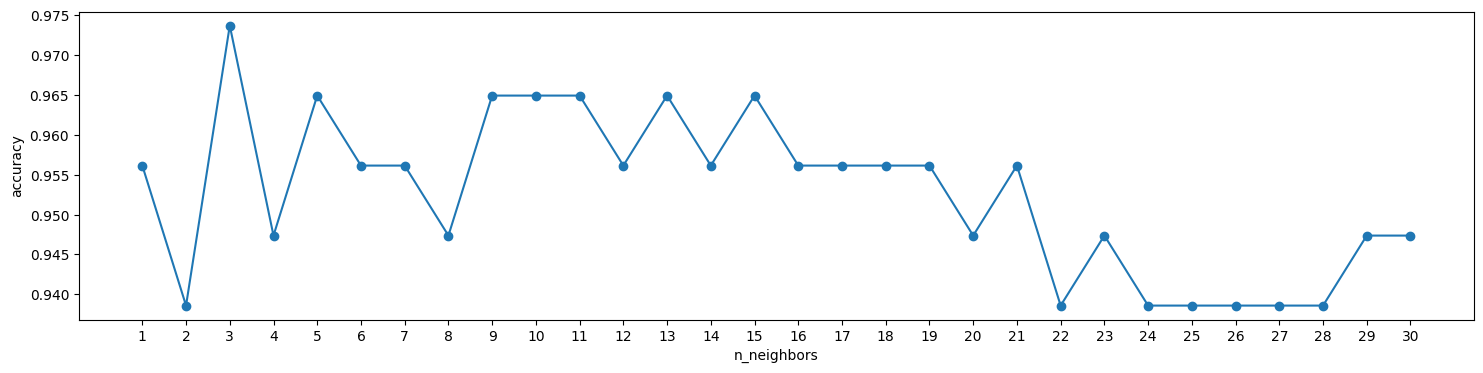

In [ ]:
# cari tau nilai n yang optimal
plt.subplots(figsize=(18, 4))

# buat index
a_index = list(range(1, 31))

# buat list kosong
a = []

# buat range u/ x-axis
x = range(1, 31)

# loop
for i in range(1, 31):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)
  a.append(accuracy_score(y_test, prediction))

# plot
plt.plot(a_index, a, marker="o")
plt.xticks(x)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

eval_model(knn, X_train, y_train)
print(" ")
eval_model(knn, X_test, y_test)

Accuracy: 0.958
Precision: 0.969
Recall: 0.917
F1 Score: 0.942
 
Accuracy: 0.974
Precision: 0.955
Recall: 0.977
F1 Score: 0.966


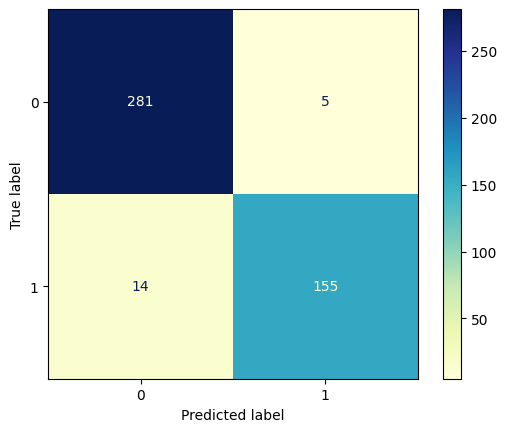

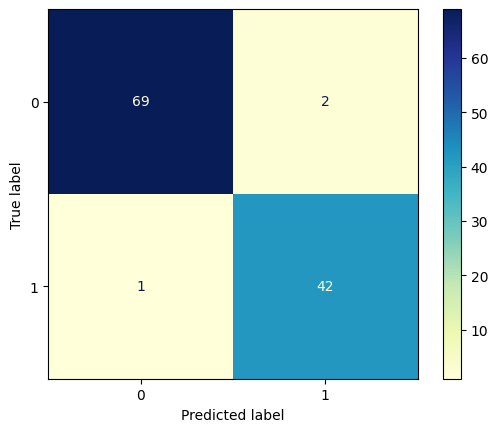

In [ ]:
cm_display(knn, X_train, y_train)
print(' ')
cm_display(knn, X_test, y_test)

In [ ]:
pd.set_option('display.float_format', '{:.3f}'.format)
models = [logreg, dt, rf, knn]

results = pd.DataFrame({
    'Model' : ['LogReg', 'Decision Tree', 'Random Forest', 'KNN'],
    'Accuracy' : [accuracy_score(y_test, model.predict(X_test)) for model in models],
    'Precision' : [precision_score(y_test, model.predict(X_test)) for model in models],
    'Recall' : [recall_score(y_test, model.predict(X_test)) for model in models],
    'F1 Score' : [f1_score(y_test, model.predict(X_test)) for model in models],
})

results

,Model,Accuracy,Precision,Recall,F1 Score
0,LogReg,0.974,0.955,0.977,0.966
1,Decision Tree,0.947,0.951,0.907,0.929
2,Random Forest,0.947,0.951,0.907,0.929
3,KNN,0.974,0.955,0.977,0.966


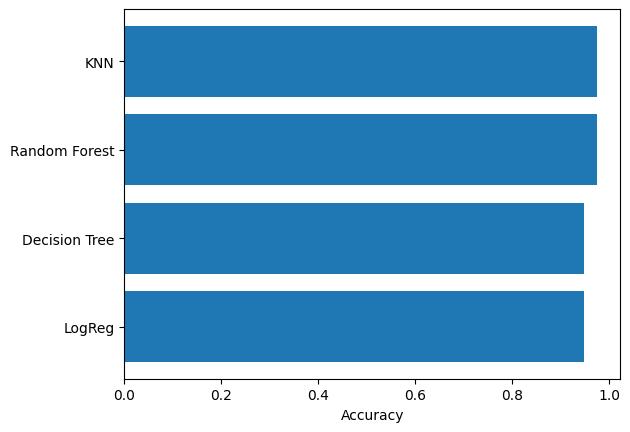

In [ ]:
model =

In [ ]:
results_melted = pd.melt(results, id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [ ]:
results_melted

,Model,variable,value
0,LogReg,Accuracy,0.974
1,Decision Tree,Accuracy,0.947
2,Random Forest,Accuracy,0.947
3,KNN,Accuracy,0.974
4,LogReg,Precision,0.955
5,Decision Tree,Precision,0.951
6,Random Forest,Precision,0.951
7,KNN,Precision,0.955
8,LogReg,Recall,0.977
9,Decision Tree,Recall,0.907


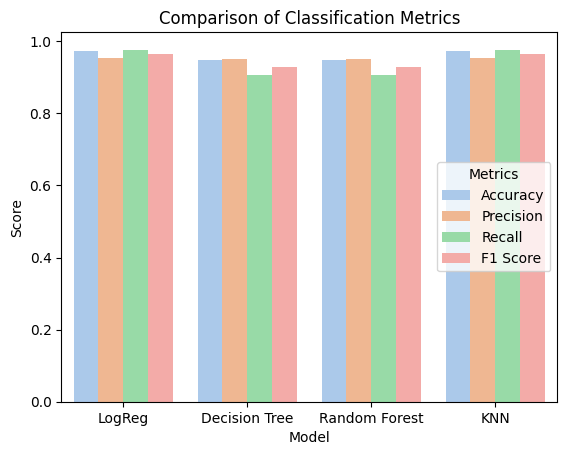

In [ ]:
sns.barplot(x='Model', y='value', hue='variable', data=results_melted, palette='pastel')
plt.title('Comparison of Classification Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metrics', loc='center right')
plt.show()

# Simulation

In [ ]:
data_simulasi = df_selected.sample(10, random_state=42)
data_simulasi

,concave_points3,perimeter3,concave_points1,radius3,perimeter1,Diagnosis
204,0.102,96.050,0.038,14.970,81.090,0
70,0.179,165.900,0.080,24.860,123.600,1
131,0.151,124.900,0.081,19.260,101.700,1
431,0.074,89.610,0.028,12.880,81.470,0
540,0.069,78.780,0.026,12.260,74.650,0
567,0.265,184.600,0.152,25.740,140.100,1
369,0.243,195.000,0.150,27.660,147.200,1
29,0.146,134.900,0.080,20.010,115.000,1
81,0.171,96.660,0.070,15.530,86.490,0
477,0.062,101.200,0.013,15.140,88.970,0


In [ ]:
X_simulasi = data_simulasi.drop('Diagnosis', axis=1)
X_simulasi = scaler.transform(X_simulasi)

prediksi = knn.predict(X_simulasi)

In [ ]:
data_simulasi['Prediksi'] = prediksi
data_simulasi

,concave_points3,perimeter3,concave_points1,radius3,perimeter1,Diagnosis,Prediksi
204,0.102,96.050,0.038,14.970,81.090,0,0
70,0.179,165.900,0.080,24.860,123.600,1,1
131,0.151,124.900,0.081,19.260,101.700,1,1
431,0.074,89.610,0.028,12.880,81.470,0,0
540,0.069,78.780,0.026,12.260,74.650,0,0
567,0.265,184.600,0.152,25.740,140.100,1,1
369,0.243,195.000,0.150,27.660,147.200,1,1
29,0.146,134.900,0.080,20.010,115.000,1,1
81,0.171,96.660,0.070,15.530,86.490,0,1
477,0.062,101.200,0.013,15.140,88.970,0,0


In [ ]:
print("Akurasi Simulasi: %.2f" %accuracy_score(data_simulasi['Diagnosis'], data_simulasi['Prediksi']))

Akurasi Simulasi: 0.90


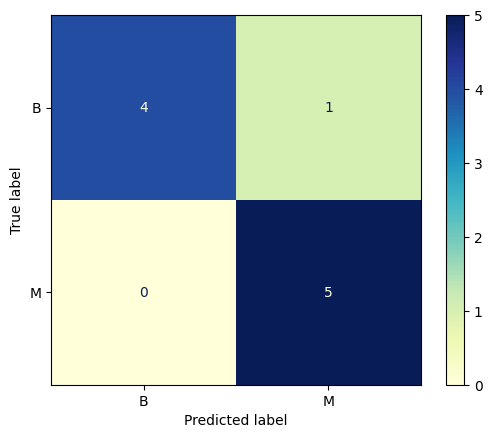

In [ ]:
cm = confusion_matrix(data_simulasi['Diagnosis'], data_simulasi['Prediksi'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['B', 'M'])
disp.plot(cmap=plt.cm.YlGnBu)
plt.show()